In [1]:
!pip install -U tensorflow==1.15

  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


tensorflow-gpu 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.15.0 which is incompatible.
tensorflow-gpu 1.13.1 has requirement tensorflow-estimator<1.14.0rc0,>=1.13.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\s164255\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12236024976752890634
]


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, homogeneity_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py

import seaborn as sns
import shap

from scipy.spatial.distance import euclidean, cosine
import umap
import random


In [11]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
# import tensorflow.keras as keras
# import tensorflow as tf


# config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

In [5]:
# This model training code is directly from:
# https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

# This model training code is directly from:
# https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''


from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, homogeneity_score

In [6]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 16

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [7]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [8]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 2, "#") for i in data[0]] )
print(decoded) 

# that on as about parts admit ready speaking really care boot see holy and again who each a are any about brought life what power # br they sound everything a though and part life look # fan recommend like and part elegant successful for feeling from this based and take what as of those core movie that on and manage airplane 4 and on me because i as about parts from been was this military and on for kill for i as cinematography with catalina a which let i is left is two a and seat raises as sound see worried by and still i as from running a are off good who scene some are church by of on i come he bad more a that gives as into advertisement is and films best commenting was each and # to rid a beyond who me about parts final his keep special has to and peet manages this characters how and perhaps was american too at references no his something of enough russ with and bit on film say final his sound a back one jews with good who he there's made are characters and bit really as from harr

In [9]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...
Train on 25000 samples, validate on 25000 samples
25000/25000 [==============================] - 22s 896us/sample - loss: 0.3797 - acc: 0.8334
Test score: 0.37966384003162384
Test accuracy: 0.8334


In [10]:
x_train.shape

(25000, 80)

## Explain the model with DeepExplainer and visualize the first prediction

In [11]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, x_train[:100])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test[:100])

Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


In [14]:
shap_values[0].shape

(100, 80)

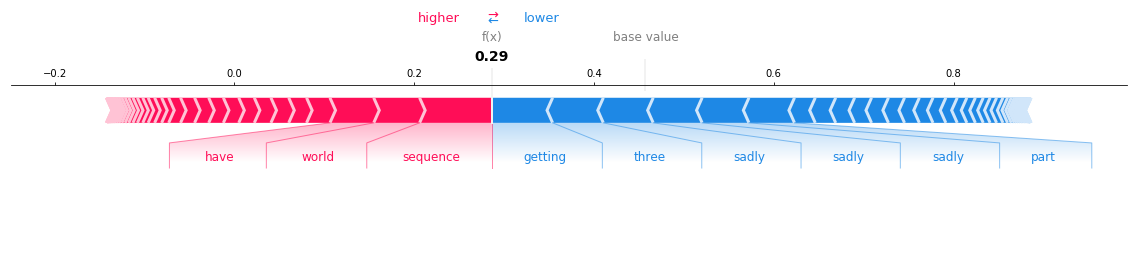

In [19]:
# transform the indexes to words
import numpy as np
words = imdb.get_word_index()
num2word = {}
for w in words.keys():
    num2word[words[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), x_test[i]))) for i in range(10)])

# plot the explanation of the first prediction
# Note the model is "multi-output" because it is rank-2 but only has one column
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test_words[0], matplotlib=True)

In [22]:
num2word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [21]:
x_test_words[0].shape

(80,)

In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i , "#") for i in x_test[1]])
print(decoded) 

drugs keep guy i i was throwing room sugar as it by br be plot many for occasionally film verge boyfriend difficult kid as you it failed not if gerard to if woman in launching is police fi spooky or of self what have pretty in can so suit you good 2 which why super as it main of my i i  if time screenplay in same this remember assured have action one in realistic that better of lessons


Note that each sample is an IMDB review text document, represented as a sequence of words. This means "feature 0" is the first word in the review, which will be different for difference reviews. This means calling summary_plot will combine the importance of all the words by their position in the text. This is likely not what you want for a global measure of feature importance (which is why we have not called summary_plot here). If you do want a global summary of a word's importance you could pull apart the feature attribution values and group them by words.

In [22]:
shap_np = np.asarray(shap_values)

In [23]:
shap_np.shape

(1, 100, 80)

In [24]:
shap_np = shap_np.reshape(100, 80)

In [25]:
shap_np.shape

(100, 80)

In [32]:
n_clusters = 10

In [33]:
kmeans = KMeans(n_clusters= n_clusters, n_jobs=-1)
kmeans.fit(shap_np)
print("Homogenity score", homogeneity_score(y_test[:100], kmeans.labels_))

Homogenity score 0.4459532118940285


In [34]:
# Find similarity of each point in cluster to its centroid
similarity_to_center = []
for i, instance in enumerate(shap_np):
    cluster_label = kmeans.labels_[i] # cluster of this instance
    centroid = kmeans.cluster_centers_[cluster_label] # cluster center of the cluster of that instance
    similarity = 1-cosine(instance, centroid) # 1- cosine distance gives similarity
    similarity_to_center.append(similarity)

In [35]:
centroid_match = [None]*n_clusters
centroid_indices =[None]*n_clusters
for i, instance in enumerate(shap_np):
    cluster_label = kmeans.labels_[i]     
    if centroid_match[cluster_label] is None or similarity_to_center[i] > centroid_match[cluster_label]:
        centroid_indices[cluster_label] = i
        centroid_match[cluster_label] = similarity_to_center[i]
        

In [ ]:
data = []
collect = dict()
color = ['hsl(' + str(h) + ',80%' + ',50%)' for h in np.linspace(0, 255, n_clusters)]
# color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(n_clusters)]
for cluster_id in np.unique(kmeans.labels_):
    cluster_indices = np.where(kmeans.labels_ == cluster_id)    
    cluster_text = df_test[cluster_indices]
    center_index = centroid_indices[cluster_id]

    cp = principals[cluster_indices]
    data.append(go.Scatter(x = cp[:,0],
                   y = cp[:,1],
                   mode='markers',                    
                hovertext=cluster_text,
                           text = cluster_text,
                           textposition = 'middle right',
                            marker=dict(color=color[cluster_id],
                                                   size=10),
                           name = 'cluster '+ str(cluster_id)
                          ))
    data.append(go.Scatter(x = [principals[center_index, 0]],
                   y = [principals[center_index, 1]],
                           visible=True,
                   mode='markers',  
                           marker=dict(color=color[cluster_id],
                                                   size=15,
                                                   line=dict(color='black', width=5)),
                           name = 'centroid cluster '+ str(cluster_id)
                          ))
    collect[cluster_id] = df_test[cluster_indices]
    
fig = go.Figure(data=data)
fig.show()
#plotly.offline.plot(fig)